<a href="https://colab.research.google.com/github/Lahari529/assignment_PDS/blob/main/assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question - 1**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [2]:
df = pd.read_csv("/content/frailty .csv")
df

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y
5,68.7,123,50,26,N
6,69.8,141,51,22,Y
7,70.1,136,23,20,Y
8,67.9,112,17,19,N
9,66.8,120,39,31,N


In [3]:
df.shape


(10, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Height         10 non-null     float64
 1   Weight         10 non-null     int64  
 2   Age            10 non-null     int64  
 3   Grip Strength  10 non-null     int64  
 4   Frailty        10 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 532.0+ bytes


In [5]:
df.dtypes

,0
Height,float64
Weight,int64
Age,int64
Grip Strength,int64
Frailty,object


In [6]:
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Grip Strength,0
Frailty,0


In [7]:
# Convert 'Frailty' to binary (0 = No, 1 = Yes)
df['Frailty'] = df['Frailty'].map({'N': 0, 'Y': 1})
df

,Height,Weight,Age,Grip Strength,Frailty
0,65.8,112,30,30,0
1,71.5,136,19,31,0
2,69.4,153,45,29,0
3,68.2,142,22,28,1
4,67.8,144,29,24,1
5,68.7,123,50,26,0
6,69.8,141,51,22,1
7,70.1,136,23,20,1
8,67.9,112,17,19,0
9,66.8,120,39,31,0


In [8]:
df.to_csv("cleaned_data.csv", index=False)

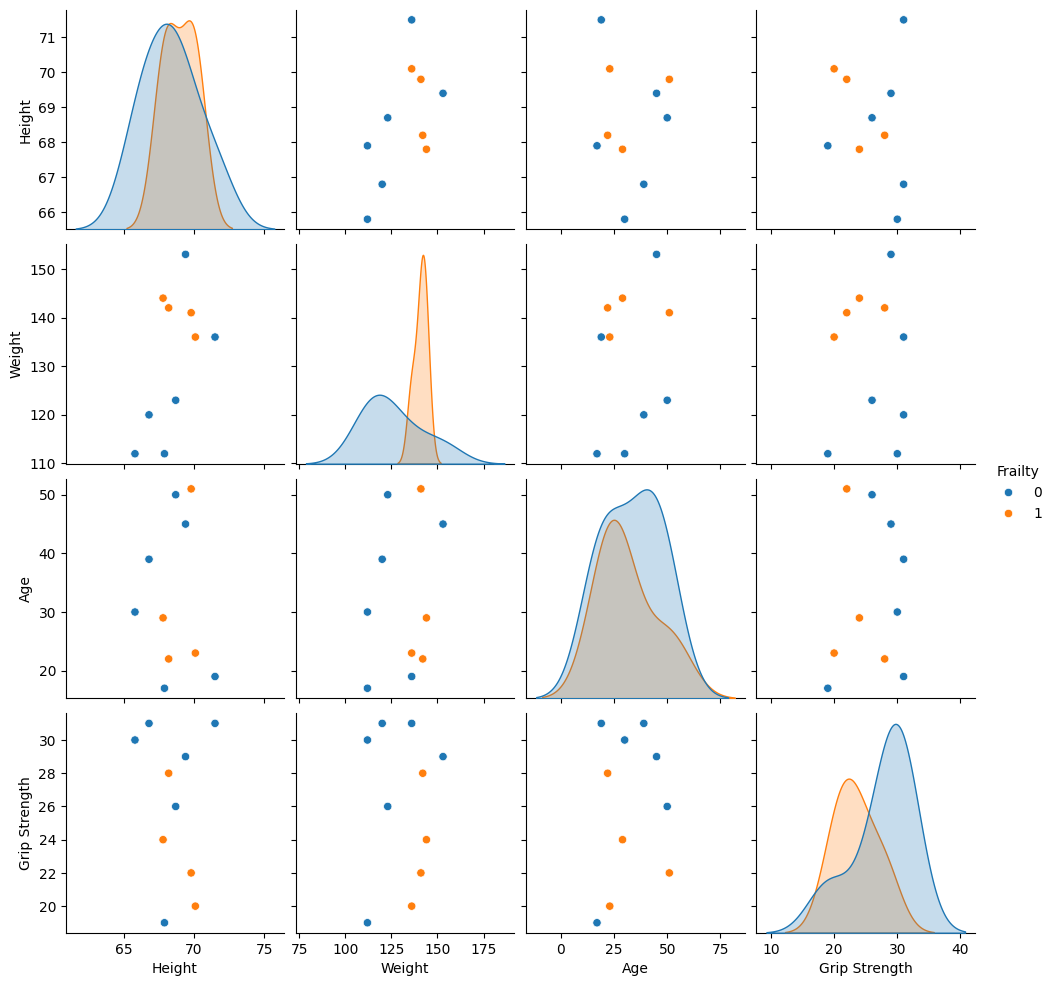

In [9]:
# Stage 3: Visualization
sns.pairplot(df, hue='Frailty', diag_kind='kde')
plt.savefig("pairplot.png")
plt.show()

<ipython-input-11-e50ef00292f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["Frailty"], y=df["Grip Strength"], palette="Set2")


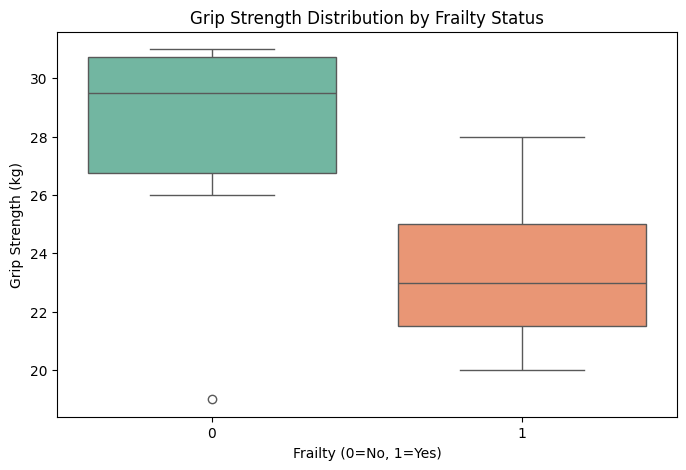

In [11]:
# Boxplot of grip strength by frailty status
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Frailty"], y=df["Grip Strength"], palette="Set2")
plt.xlabel("Frailty (0=No, 1=Yes)")
plt.ylabel("Grip Strength (kg)")
plt.title("Grip Strength Distribution by Frailty Status")
plt.savefig("grip_strength_vs_frailty.png")
plt.show()

In [12]:
# Statistical Analysis: T-test comparing grip strength between frail and non-frail participants
frail = df[df['Frailty'] == 1]['Grip Strength']
non_frail = df[df['Frailty'] == 0]['Grip Strength']

t_stat, p_value = stats.ttest_ind(non_frail, frail, equal_var=False)
print(f"T-test Results: t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}")

T-test Results: t-statistic = 1.635, p-value = 0.14157


In [13]:
# Save statistical results
with open("results.txt", "w") as f:
    f.write(f"T-test Results:\n t-statistic = {t_stat:.3f}, p-value = {p_value:.5f}\n")

**Question - 2**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
# Load the dataset
#data_path = "data/raw/student_performance.csv"
df = pd.read_csv("/content/StudentsPerformance.csv")

In [17]:
# Display first few rows
display(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
# Compute Final Grade (G3) based on available scores
df['G3'] = (df['math score'] + df['writing score'] + df['reading score']) / 3

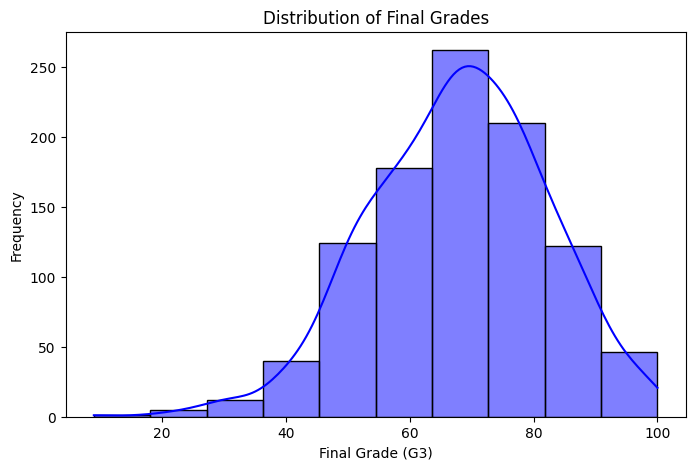

In [19]:
# Visualization 1: Distribution of Final Grades
plt.figure(figsize=(8,5))
sns.histplot(df['G3'], bins=10, kde=True, color='blue')
plt.xlabel("Final Grade (G3)")
plt.ylabel("Frequency")
plt.title("Distribution of Final Grades")
plt.savefig("grade_distribution_histogram.png")
plt.show()

<ipython-input-20-a904fb581ff3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df["lunch"], y=df["math score"], palette="Set2")  # Use math score as a proxy for final grade


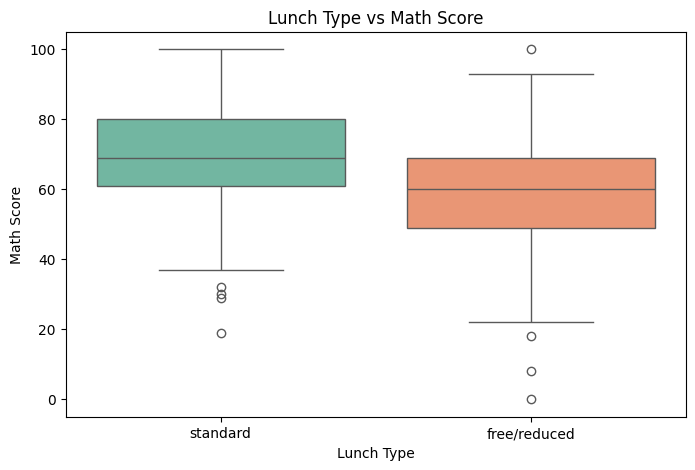

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["lunch"], y=df["math score"], palette="Set2")  # Use math score as a proxy for final grade
plt.xlabel("Lunch Type")
plt.ylabel("Math Score")
plt.title("Lunch Type vs Math Score")
plt.savefig("lunch_vs_math_score_boxplot.png")
plt.show()


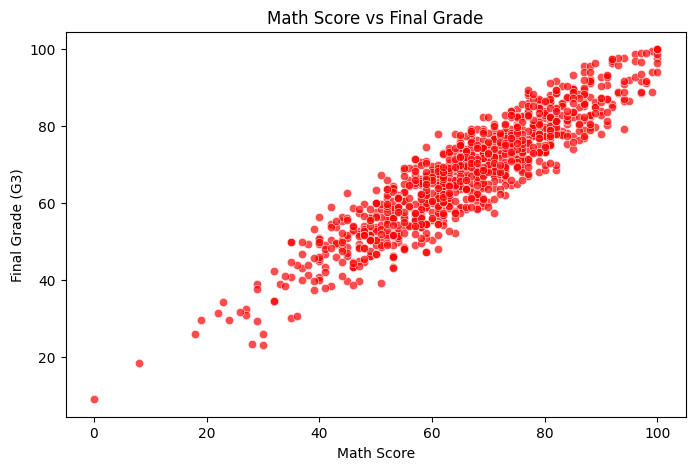

In [21]:
# Visualization 3: Math Score vs Final Grade
plt.figure(figsize=(8,5))
sns.scatterplot(x=df["math score"], y=df["G3"], alpha=0.7, color='red')
plt.xlabel("Math Score")
plt.ylabel("Final Grade (G3)")
plt.title("Math Score vs Final Grade")
plt.savefig("math_score_vs_grades_scatterplot.png")
plt.show()

<ipython-input-22-04b8483ca59d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["parental level of education"], y=df["G3"], palette="muted")


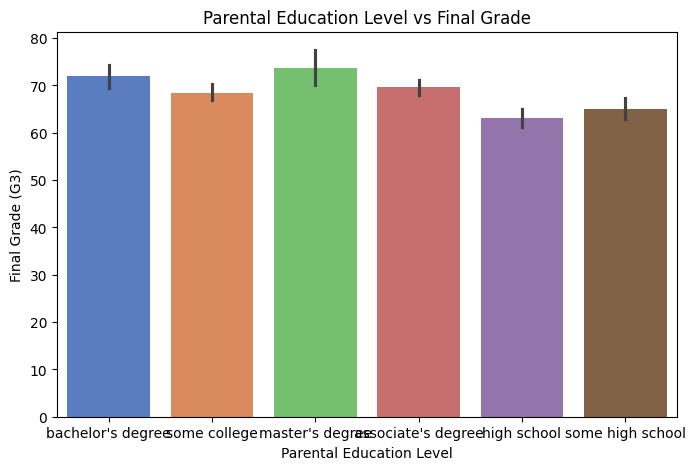

In [22]:
# Visualization 4: Parental Education Level vs Final Grade
plt.figure(figsize=(8,5))
sns.barplot(x=df["parental level of education"], y=df["G3"], palette="muted")
plt.xlabel("Parental Education Level")
plt.ylabel("Final Grade (G3)")
plt.title("Parental Education Level vs Final Grade")
plt.savefig("parental_education_vs_grades_barchart.png")
plt.show()


<ipython-input-23-f48d69e12f6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df["gender"], y=df["G3"], palette="coolwarm")


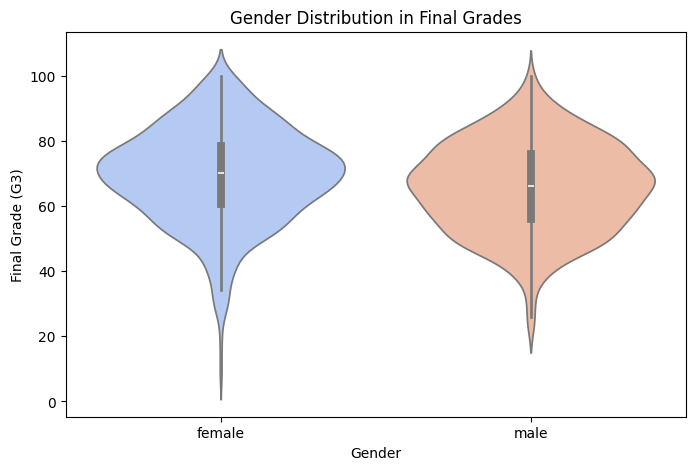

In [23]:
# Visualization 5: Gender Distribution in Final Grades
plt.figure(figsize=(8,5))
sns.violinplot(x=df["gender"], y=df["G3"], palette="coolwarm")
plt.xlabel("Gender")
plt.ylabel("Final Grade (G3)")
plt.title("Gender Distribution in Final Grades")
plt.savefig("gender_vs_grades_violinplot.png")
plt.show()
